### Importing Libraries

In [130]:
import pandas
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [201]:
df = pandas.read_csv("final_data.csv")

In [202]:
df.shape

(429, 4)

In [203]:
df.columns = ['Words', 'Mean', 'Variance', 'Standard Deviation']

In [204]:
df.head(5)

,Words,Mean,Variance,Standard Deviation
0,4,-0.063887,-0.088837,-0.347916
1,1,0.034466,-0.088936,-0.370847
2,1,0.025561,-0.088923,-0.366402
3,6,-0.449397,0.069288,1.043009
4,3,0.028499,-0.088735,-0.333685


In [205]:
df.corr(method ='pearson')

,Words,Mean,Variance,Standard Deviation
Words,1.000000,0.029706,-0.017175,-0.008790
Mean,0.029706,1.000000,-0.001227,0.037874
Variance,-0.017175,-0.001227,1.000000,0.829359
Standard Deviation,-0.008790,0.037874,0.829359,1.000000


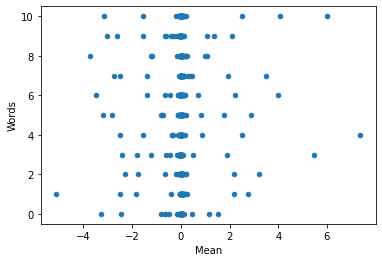

In [168]:
df.plot(kind = 'scatter', x = 'Mean', y = 'Words')  
plt.show()

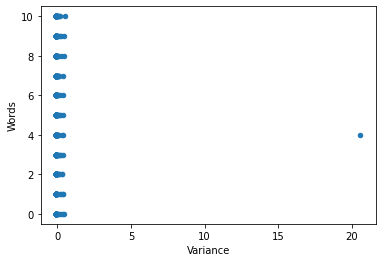

In [170]:
df.plot(kind = 'scatter', x = 'Variance', y = 'Words')  
plt.show()

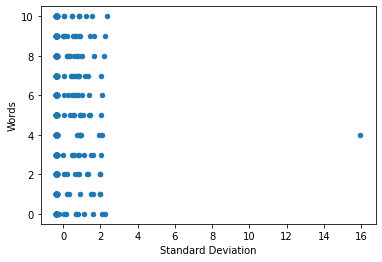

In [167]:
df.plot(kind = 'scatter', x = 'Standard Deviation', y = 'Words')  
plt.show()

In [206]:
df.drop(columns = 'Variance', inplace = True)
df.drop(columns = 'Standard Deviation', inplace = True)

In [207]:
y = df.iloc[:, 0]
x = df.iloc[:, 1: ]

In [208]:
x.head(5)

,Mean
0,-0.063887
1,0.034466
2,0.025561
3,-0.449397
4,0.028499


In [209]:
y.head(5)

0    4
1    1
2    1
3    6
4    3
Name: Words, dtype: int64

### Classification

In [210]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [211]:
x_train.shape, x_test.shape

((321, 1), (108, 1))

In [212]:
y_train.shape, y_test.shape

((321,), (108,))

#### Multilayer Perceptron

In [213]:
iter = []
acc = []
for i in range(1, 50) :
    clf = MLPClassifier(hidden_layer_sizes=(1000, 100, 10), max_iter=i, alpha=0.001, solver='sgd')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    iter.append(i)
    acc.append(accuracy_score(y_test, y_pred))

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimiza

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (33) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36) reached and the opti

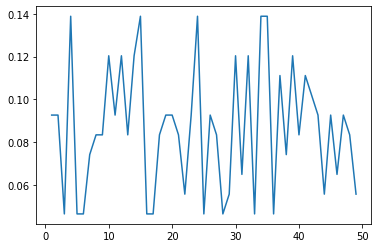

In [214]:
plt.plot(iter, acc)

#### Support Vector Machine

In [183]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [215]:
iter = []
acc = []
for i in range(1, 150):
    classifier = make_pipeline(StandardScaler(), LinearSVC(max_iter=i))
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    iter.append(i)
    acc.append(accuracy_score(y_test, y_pred))

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  

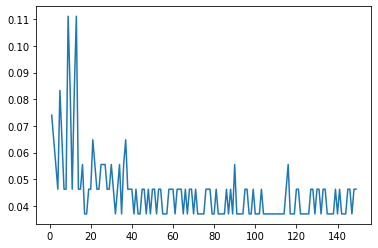

In [216]:
plt.plot(iter, acc)

#### Random Forest Classifier

In [186]:
from sklearn.ensemble import RandomForestClassifier

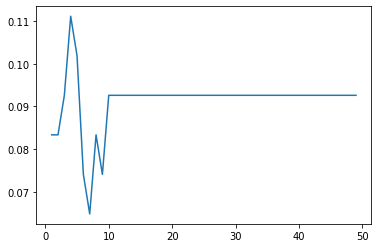

In [217]:
iter = []
acc = []
for i in range(1, 50):
    classifier = RandomForestClassifier(max_depth=i, random_state=0)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    iter.append(i)
    acc.append(accuracy_score(y_test, y_pred))
plt.plot(iter, acc)

#### K-NN

In [195]:
from sklearn.neighbors import KNeighborsClassifier

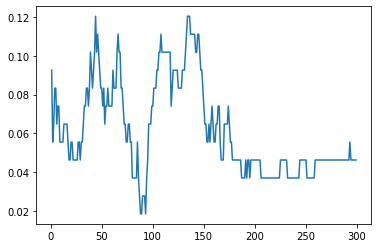

In [218]:
iter = []
acc = []
for i in range(1, 300):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train, y_train)
    y_pred = neigh.predict(x_test)
    iter.append(i)
    acc.append(accuracy_score(y_test, y_pred))
plt.plot(iter, acc)